# Sheet 9: Generative Adversarial Networks

## Task 1a): Optimal Discriminator
To find the optimal discriminator we start of with equation (1) from the exercise sheet:
\begin{equation}
V(D,G)=\mathbb{E}_{x\sim p_{data}\left(x\right)}\left[\log\left(D\left(x\right)\right)\right]+
\mathbb{E}_{z\sim p\left(z\right)}\left[\log\left(1-D\left(G\left(z\right)\right)\right)\right]
\end{equation}
Writing out the expectation gives us
\begin{equation}
V(D,G)=\int p_{data}\left(x\right)\log\left(D\left(x\right)\right)\,dx+
\int p\left(z\right)\log\left(1-D\left(G\left(z\right)\right)\right)\,dz
\end{equation}

Our goal is to rewrite the integral over $z$ in terms of $x$.
What happens if we use the change of variables theorem?
\begin{equation}
x=G\left(z\right) \implies \int p\left(G^{-1}\left(x\right)\right)\log\left(1-D\left(x\right)\right)
\frac{1}{G'\left(G\left(x\right)\right)}\,dx
\tag{3}
\end{equation}
Problem: In most cases $G$ is not invertible!

Instead we can introduce the generator probability $p_{gen}\left(x\right)$ in the space $x$ (Radon-Nikodym).
Thus our integral reads
\begin{equation}
\int p\left(z\right)\log\left(1-D\left(G\left(z\right)\right)\right)\,dz = \int p_{gen}\left(x\right)\log\left(1-D\left(x\right)\right)\,dx
\tag{4}
\end{equation}
Which gives us
\begin{equation}
V(D,G)=\int p_{data}\left(x\right)\log\left(D\left(x\right)\right) + p_{gen}\left(x\right)\log\left(1-D\left(x\right)\right)\,dx
\tag{5}
\end{equation}

The generator objective is
\begin{split}
D^*=\max_D V(D,G) &= \max_D \int p_{data}\left(x\right)\log\left(D\left(x\right)\right) + p_{gen}\left(x\right)\log\left(1-D\left(x\right)\right)\,dx\\
&\leq \int \max_D p_{data}\left(x\right)\log\left(D\left(x\right)\right) + p_{gen}\left(x\right)\log\left(1-D\left(x\right)\right)\,dx
\end{split}
The solution of maximizing the integral has the form 
\begin{equation}
f\left(D\right)a\log\left(D\right)+b\log\left(1-D\right)
\tag{7}
\end{equation}
A maximum (no proof here!) can be found at $D_{max}=\frac{a}{a+b}$, which gives us
\begin{equation}
D^*=\frac{p_{data}}{p_{data}+p_{gen}}
\tag{8}
\end{equation}

## Task1b): Optimal Generator
We start by put (8) in (5):
\begin{equation}
V(D,G)=\int p_{data}\left(x\right)\log\left(\frac{p_{data}}{p_{data}+p_{gen}}\right) + p_{gen}\left(x\right)\log\left(1-\frac{p_{data}}{p_{data}+p_{gen}}\right)\,dx
\tag{9}
\end{equation}
Further simplifiying the rightmost term
\begin{equation}
1-\frac{p_{data}}{p_{data}+p_{gen}}=\frac{p_{data}+p_{gen}-p_{data}}{p_{data}+p_{gen}}=\frac{p_{gen}}{p_{data}+p_{gen}}
\tag{10}
\end{equation}
gives us
\begin{equation}
V(D,G)=\int p_{data}\left(x\right)\log\left(\frac{p_{data}}{p_{data}+p_{gen}}\right) + p_{gen}\left(x\right)\log\left(\frac{p_{gen}}{p_{data}+p_{gen}}\right)\,dx
\tag{11}
\end{equation}

The Jenson-Shannon divergence between $p_{data}$ and $p_{gen}$ is
\begin{equation}
JSD\left(p_{data}||p_{gen}\right) = \frac{1}{2}\int p_{data}\log\left(\frac{p_{data}}{\frac{p_{data}+p_{gen}}{2}}\right) +
p_{gen}\log\left(\frac{p_{gen}}{\frac{p_{data}+p_{gen}}{2}}\right) \,dx\\
\tag{12}
\end{equation}

Comparing (11) and (12) shows that if we get rid of the factor 2 in the log we have the JSD.
We achieve this by adding a zero to the integral
\begin{split}
V(D,G)&=\int \left(\log\left(2\right)-\log\left(2\right)\right)p_{data}\left(x\right) + p_{data}\left(x\right)\log\left(\frac{p_{data}}{p_{data}+p_{gen}}\right) + 
\left(\log\left(2\right)-\log\left(2\right)\right)p_{gen}\left(x\right) + p_{gen}\left(x\right)\log\left(\frac{p_{gen}}{p_{data}+p_{gen}}\right)\,dx\\
&=\int p_{data}\left(x\right)\log\left(\frac{p_{data}}{p_{data}+p_{gen}}\right) + p_{gen}\left(x\right)\log\left(\frac{p_{gen}}{p_{data}+p_{gen}}\right)\,dx -\log\left(2\right)\int p_{data}\left(x\right)\,dx
-\log\left(2\right)\int p_{gen}\left(x\right)\,dx\\
&=\int p_{data}\left(x\right)\log\left(\frac{p_{data}}{p_{data}+p_{gen}}\right) + p_{gen}\left(x\right)\log\left(\frac{p_{gen}}{p_{data}+p_{gen}}\right)\,dx -\log\left(4\right)
\end{split}
This results in
\begin{equation}
V\left(D,G\right)=2JSD\left(p_{data}||p_{gen}\right)-\log\left(4\right)
\tag{14}
\end{equation}

To find the optimal generator we need to minimize $V$
\begin{equation}
min_G V\left(D,G\right)= min_G 2JSD\left(p_{data}||p_{gen}\right)-\log\left(4\right)
\tag{14}
\end{equation}
The minimum is achieved when $JSD\left(p_{data}||p_{gen}\right)=0$ as $0\leq JSD \leq 1)$ holds.

This is the case for $p_{data}=p_{gen}$. As a result we get $D^*=\frac{1}{2}$, which indicates that the discriminator is maximally unsure wether we have a real or a fake sample.

## Task 2: Training a GAN

In [1]:
import os
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
from torchvision import transforms as trafos

from einops import rearrange

import time

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#dataset
batch_size=128
trafo_train = trafos.Compose([trafos.RandomHorizontalFlip(),
                        trafos.ToTensor(), trafos.Resize(32), trafos.Normalize((0.5), (0.5))])
trafo_test = trafos.Compose([trafos.ToTensor(), trafos.Resize(32), trafos.Normalize((0.5), (0.5))])

trainset = torchvision.datasets.FashionMNIST(root="datasets", train=True, download=True, transform=trafo_train)
testset = torchvision.datasets.FashionMNIST(root="datasets", train=False, download=True, transform=trafo_test)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, num_workers=16, drop_last=False, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, num_workers=16, drop_last=False, shuffle=False)

In [3]:
class SConv2d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=True):
        super().__init__()
        
        conv = nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, stride=stride, padding=padding,
                        bias=bias)
        self.conv = nn.utils.spectral_norm(conv)
        
    def forward(self, x):
        return self.conv(x)
    
class SLinear(nn.Module):
    def __init__(self, in_channels, out_channels, bias=True):
        super().__init__()
        
        linear = nn.Linear(in_channels, out_channels, bias=bias)
        self.linear = nn.utils.spectral_norm(linear)
        
    def forward(self, x):
        return self.linear(x)
        

class Generator(nn.Module):
    def __init__(self, which_conv=nn.Conv2d, z_channels=100, nf=64, class_cond=True, embed_dim=32, num_classes=10):
        super().__init__()
        
        self.class_cond = class_cond
        if class_cond:
            self.embedding = nn.Embedding(num_classes, embed_dim)
        else:
            embed_dim = 0
        
        initial = [nn.Linear(z_channels+embed_dim, 4*4*nf*8), nn.BatchNorm1d(4*4*nf*8), nn.ReLU(True)]
        self.initial = nn.Sequential(*initial)
        
        # read https://distill.pub/2016/deconv-checkerboard/
        block = [
                nn.Upsample(scale_factor=2.0, mode='nearest'),
                which_conv(nf*8, nf*4, kernel_size=3, stride=1, padding=1),
                nn.BatchNorm2d(nf*4),
                nn.ReLU(True),
                nn.Upsample(scale_factor=2.0, mode='nearest'),
                which_conv(nf*4, nf*2, kernel_size=3, stride=1, padding=1),
                nn.BatchNorm2d(nf*2),
                nn.ReLU(True),
                nn.Upsample(scale_factor=2.0, mode='nearest'),
                which_conv(nf*2, nf, kernel_size=3, stride=1, padding=1),
                nn.BatchNorm2d(nf),
                nn.ReLU(True),
                which_conv(nf, 1, kernel_size=3, stride=1, padding=1),
                nn.Tanh()
                ]
        self.block = nn.Sequential(*block)
        
    def forward(self, z, c=None):
        if self.class_cond and c is not None:
            c = self.embedding(c)
            z = torch.cat([z, c], dim=1)
        x = self.initial(z)
        x = rearrange(x, "b (c h w) -> b c h w", h=4, w=4)
        return self.block(x)


class Discriminator(nn.Module):
    def __init__(self, which_conv=nn.Conv2d, which_linear=nn.Linear, 
                 nf=64, class_cond=True, embed_dim=32, num_classes=10, dropout=0.0):
        super().__init__()

        block = [which_conv(1, nf, kernel_size=3, stride=1,padding=1, bias=False), nn.LeakyReLU(0.2,True),
                which_conv(nf, nf*2, kernel_size=4, stride=2, padding=1, bias=False), nn.LeakyReLU(0.2,True),
                which_conv(nf*2, nf*4, kernel_size=4, stride=2,padding=1, bias=False), nn.LeakyReLU(0.2,True),
                which_conv(nf*4, nf*8, kernel_size=4, stride=2,padding=1), nn.LeakyReLU(0.2,True)]
        self.block = nn.Sequential(*block)

        self.class_cond = class_cond
        if class_cond:
            self.embedding = nn.Embedding(num_classes, embed_dim)
        else:
            embed_dim = 0

        block2 = [nn.Dropout(dropout), which_linear(4*4*nf*8+embed_dim, 100), nn.LeakyReLU(0.2, True)]
        self.block2 = nn.Sequential(*block2)
        
        self.final = which_linear(100, 1)

    def forward(self, x, c=None):
        x = self.block(x)
        x = rearrange(x, "b c h w -> b (c h w)")
        
        if self.class_cond and c is not None:
            c = self.embedding(c)
            x = torch.cat([x, c], dim=1)

        x = self.block2(x)

        return self.final(x)

    def set_grad(self, status):
        for p in self.parameters():
            p.requires_grad = status
            
class Classifier(nn.Module):
    def __init__(self, nf=64, num_classes=10):
        super().__init__()

        block = [nn.Conv2d(1, nf, kernel_size=3, stride=1, padding=1), nn.BatchNorm2d(nf), nn.LeakyReLU(0.2, True),
                nn.Conv2d(nf, nf*2, kernel_size=4, stride=2, padding=1), nn.BatchNorm2d(nf*2), nn.LeakyReLU(0.2, True),
                nn.Conv2d(nf*2, nf*4, kernel_size=4, stride=2, padding=1), nn.BatchNorm2d(nf*4), nn.LeakyReLU(0.2, True),
                nn.Conv2d(nf*4, nf*4, kernel_size=4, stride=2, padding=1), nn.BatchNorm2d(nf*4), nn.LeakyReLU(0.2, True)]
        self.block = nn.Sequential(*block)

        feature = [nn.Linear(nf*4, 100), nn.LeakyReLU(0.2, True)]
        self.feature = nn.Sequential(*feature)

        self.final = nn.Linear(100, num_classes)

    def get_features(self, x):
        x = self.block(x)
        x = torch.mean(x, dim=(2,3))
        return self.feature(x)

    def forward(self, x):
        x = self.get_features(x)
        return self.final(x)

In [4]:
def weight_init(m):
    classname = m.__class__.__name__
    if classname.find("Conv") != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.2)
        if m.bias is not None:
            nn.init.constant_(m.bias.data, 0.0)
    elif classname.find("BatchNorm") != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.2)
        if m.bias is not None:
            nn.init.constant_(m.bias.data, 0.0)

def print_parameters(net, name):
    num_params = 0
    for p in net.parameters():
        num_params += p.numel()
    
    print("{} has {:.3f}M parameters".format(name, num_params/1e6))

device = torch.device("cuda:1")

generator = Generator(class_cond=True, nf=64, embed_dim=16).to(device)
# generator.apply(weight_init)
print_parameters(generator, "Generator")

discriminator = Discriminator(which_conv=SConv2d, which_linear=SLinear, class_cond=True, embed_dim=16, nf=64).to(device)
# discriminator.apply(weight_init)
print_parameters(discriminator, "Discriminator")

#load classifier for evaluation
classifier = Classifier().to(device)
obj = torch.load("classifier.ckpt", map_location=device)
classifier.load_state_dict(obj)
classifier.eval()

lr = 1e-4
optim_g = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optim_d = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))
criterion = nn.BCEWithLogitsLoss()

Generator has 2.525M parameters
Discriminator has 3.575M parameters


In [5]:
num_epochs = 50

losses_avg_train = {"GAN": [], "Dreal": [], "Dfake": []}
acc_real = []
acc_fake = []

#fixed noise vektor
zfix = torch.randn((1,100)).to(device)
cfix = torch.LongTensor([0]).to(device)
fix_images = []

for epoch in range(1,num_epochs+1):
    start = time.time()
    #train
    generator.train()
    discriminator.train()
    cur_losses = {"GAN": [], "Dreal": [], "Dfake": []}
    num_total = 0
    num_right_real = 0
    num_right_fake = 0
    for it,data in enumerate(trainloader):
        images, targets = data
        images = images.to(device)
        targets = targets.to(device)
        
        #generate fake image
        z = torch.randn((images.size(0), 100)).to(device)
        fakes = generator(z, targets)
        
        #train discriminator
        discriminator.set_grad(True)
        optim_d.zero_grad()
        pred_real = discriminator(images, targets)
        pred_fake = discriminator(fakes.detach(), targets)
        Dreal = criterion(pred_real, torch.ones_like(pred_real))
        Dfake = criterion(pred_fake, torch.zeros_like(pred_fake))
        LossD = (Dreal + Dfake)*0.5
        LossD.backward()
        optim_d.step()
        discriminator.set_grad(False)
        
        #train generator
        optim_g.zero_grad()
        pred_fake2 = discriminator(fakes, targets)
        GAN = criterion(pred_fake2, torch.ones_like(pred_fake2))
        GAN.backward()
        optim_g.step()
        
        cur_losses["GAN"].append(GAN.item())
        cur_losses["Dreal"].append(Dreal.item())
        cur_losses["Dfake"].append(Dfake.item())
        
        c_real = torch.round(torch.sigmoid(pred_real)).squeeze()
        c_fake = torch.round(torch.sigmoid(pred_fake)).squeeze()
        
        num_total += images.size(0)
        num_right_real += torch.sum(torch.eq(c_real, torch.ones_like(targets))).cpu().numpy()
        num_right_fake += torch.sum(torch.eq(c_fake, torch.zeros_like(targets))).cpu().numpy()
        
    for k,v in cur_losses.items():
        losses_avg_train[k].append(np.mean(v))
    acc_real.append(num_right_real/num_total*100.0)
    acc_fake.append(num_right_fake/num_total*100.0)
    
    generator.eval()
    discriminator.eval()
    
    #generate a few samples
    with torch.no_grad():
        z = torch.randn((100,100)).to(device)
        target = torch.LongTensor(np.expand_dims(np.linspace(0, 9, 10), 1).repeat(10,1)).to(device).flatten()
        
        imgs = generator(z, target)
        #upsample images for better visualization
        imgs = F.interpolate(imgs, scale_factor=2.0, mode="nearest")
        imgs = (imgs.cpu()+1.0)*0.5
        grid = torchvision.utils.make_grid(imgs, nrow=10)
        grid = grid.permute(1,2,0).numpy()
        os.makedirs("samples", exist_ok=True)
        plt.imsave("samples/epoch{:05d}.png".format(epoch), grid)
    
    #plot losses
    plt.figure(dpi=300)
    plt.title("GAN Losses")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    for k, v in losses_avg_train.items():
        plt.plot(np.arange(1, epoch+1), v, label=k)
    plt.legend()
    plt.savefig("losses_gan.png")
    plt.close()
    
    plt.figure(dpi=300)
    plt.title("Classification Accuracy Discriminator")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy [%]")
    plt.plot(np.arange(1, epoch+1), acc_real, label="Real")
    plt.plot(np.arange(1, epoch+1), acc_fake, label="Fake")
    plt.legend()
    plt.savefig("accuracy_discriminator.png")
    plt.close()
    
    #generate image for fixed noise vektor
    if epoch%5==0:
        with torch.no_grad():
            img = generator(zfix, cfix)
            fix_images.append((F.interpolate(img, scale_factor=2.0, mode="nearest").cpu()+1.0)*0.5)
    
    #save weights every epoch
    torch.save({"netG": generator.state_dict(), "netD": discriminator.state_dict()}, "gan.ckpt")
    
    print("End of epoch {}. (Time taken: {:.3f}s)".format(epoch, time.time()-start))

End of epoch 1. (Time taken: 10.635s)
End of epoch 2. (Time taken: 9.765s)
End of epoch 3. (Time taken: 9.947s)
End of epoch 4. (Time taken: 9.853s)
End of epoch 5. (Time taken: 10.022s)
End of epoch 6. (Time taken: 9.696s)
End of epoch 7. (Time taken: 9.586s)
End of epoch 8. (Time taken: 10.159s)
End of epoch 9. (Time taken: 9.409s)
End of epoch 10. (Time taken: 9.759s)
End of epoch 11. (Time taken: 9.846s)
End of epoch 12. (Time taken: 9.348s)
End of epoch 13. (Time taken: 9.680s)
End of epoch 14. (Time taken: 10.145s)
End of epoch 15. (Time taken: 9.396s)
End of epoch 16. (Time taken: 9.560s)
End of epoch 17. (Time taken: 9.403s)
End of epoch 18. (Time taken: 9.741s)
End of epoch 19. (Time taken: 9.270s)
End of epoch 20. (Time taken: 9.368s)
End of epoch 21. (Time taken: 9.505s)
End of epoch 22. (Time taken: 10.504s)
End of epoch 23. (Time taken: 10.586s)
End of epoch 24. (Time taken: 10.468s)
End of epoch 25. (Time taken: 10.863s)
End of epoch 26. (Time taken: 10.393s)
End of epoch

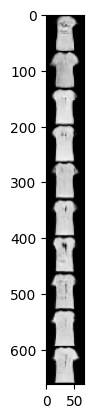

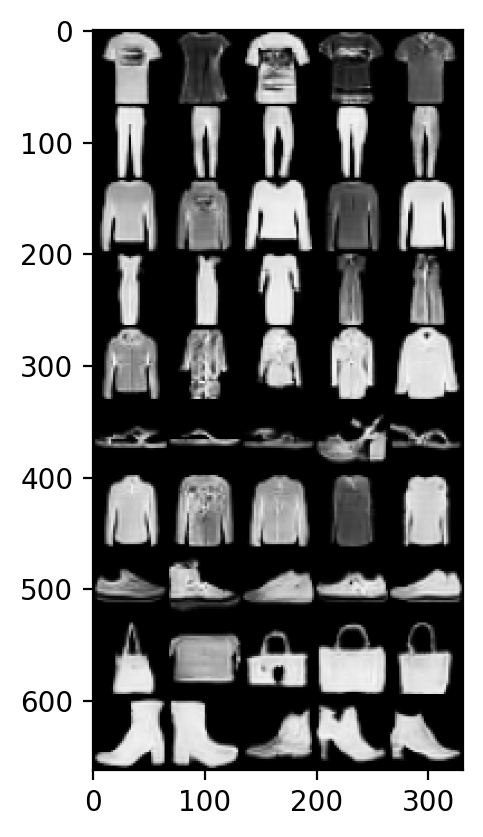

In [6]:
#create a plot for the evaluation of a single noise vektor
grid = torchvision.utils.make_grid(torch.cat(fix_images, dim=0), nrow=1)
grid = grid.permute(1,2,0).numpy()
plt.imsave("gan_evolve.png", grid)

plt.figure(dpi=100)
plt.imshow(grid)

#sample per class 5 images for visualization
samples = []
with torch.no_grad():
    for i in range(10):
        z = torch.randn((5,100)).to(device)
        target = torch.ones(5).long().to(device)*i
        
        imgs = generator(z, target)
        imgs = F.interpolate(imgs, scale_factor=2.0, mode="nearest")
        samples.append((imgs.cpu()+1.0)*0.5)
samples = torch.cat(samples, dim=0)
grid = torchvision.utils.make_grid(samples, nrow=5)
grid = grid.permute(1,2,0).numpy()
plt.imsave("gan_samples.png", grid)

plt.figure(dpi=200)
plt.imshow(grid)

In [7]:
#take 5 first classes and randomly choose 500 images per split
examples_per_class = np.zeros(5)
index = 0
train_features = []
while np.sum(examples_per_class)<2500:
    image, target = trainset[index]
    if target<5:
        examples_per_class[target] += 1
        image = image.unsqueeze(0).to(device)
        with torch.no_grad():
            feats = classifier.get_features(image)
            train_features.append(feats.cpu().numpy())
    index += 1
train_features = np.concatenate(train_features, axis=0)

examples_per_class = np.zeros(5)
index = 0
test_features = []
while np.sum(examples_per_class)<2500:
    image, target = testset[index]
    if target<5:
        examples_per_class[target] += 1
        image = image.unsqueeze(0).to(device)
        with torch.no_grad():
            feats = classifier.get_features(image)
            test_features.append(feats.cpu().numpy())
    index += 1
test_features = np.concatenate(test_features, axis=0)

#generator
#sample per class 5 images for visualization
generated_features = []
for i in range(5):
    for j in range(10):
        z = torch.randn((50,100)).to(device)
        target = torch.ones(50).long().to(device)*i

        with torch.no_grad():
            imgs = generator(z, target)
            feats = classifier.get_features(imgs)
            generated_features.append(feats.cpu().numpy())
generated_features = np.concatenate(generated_features, axis=0)

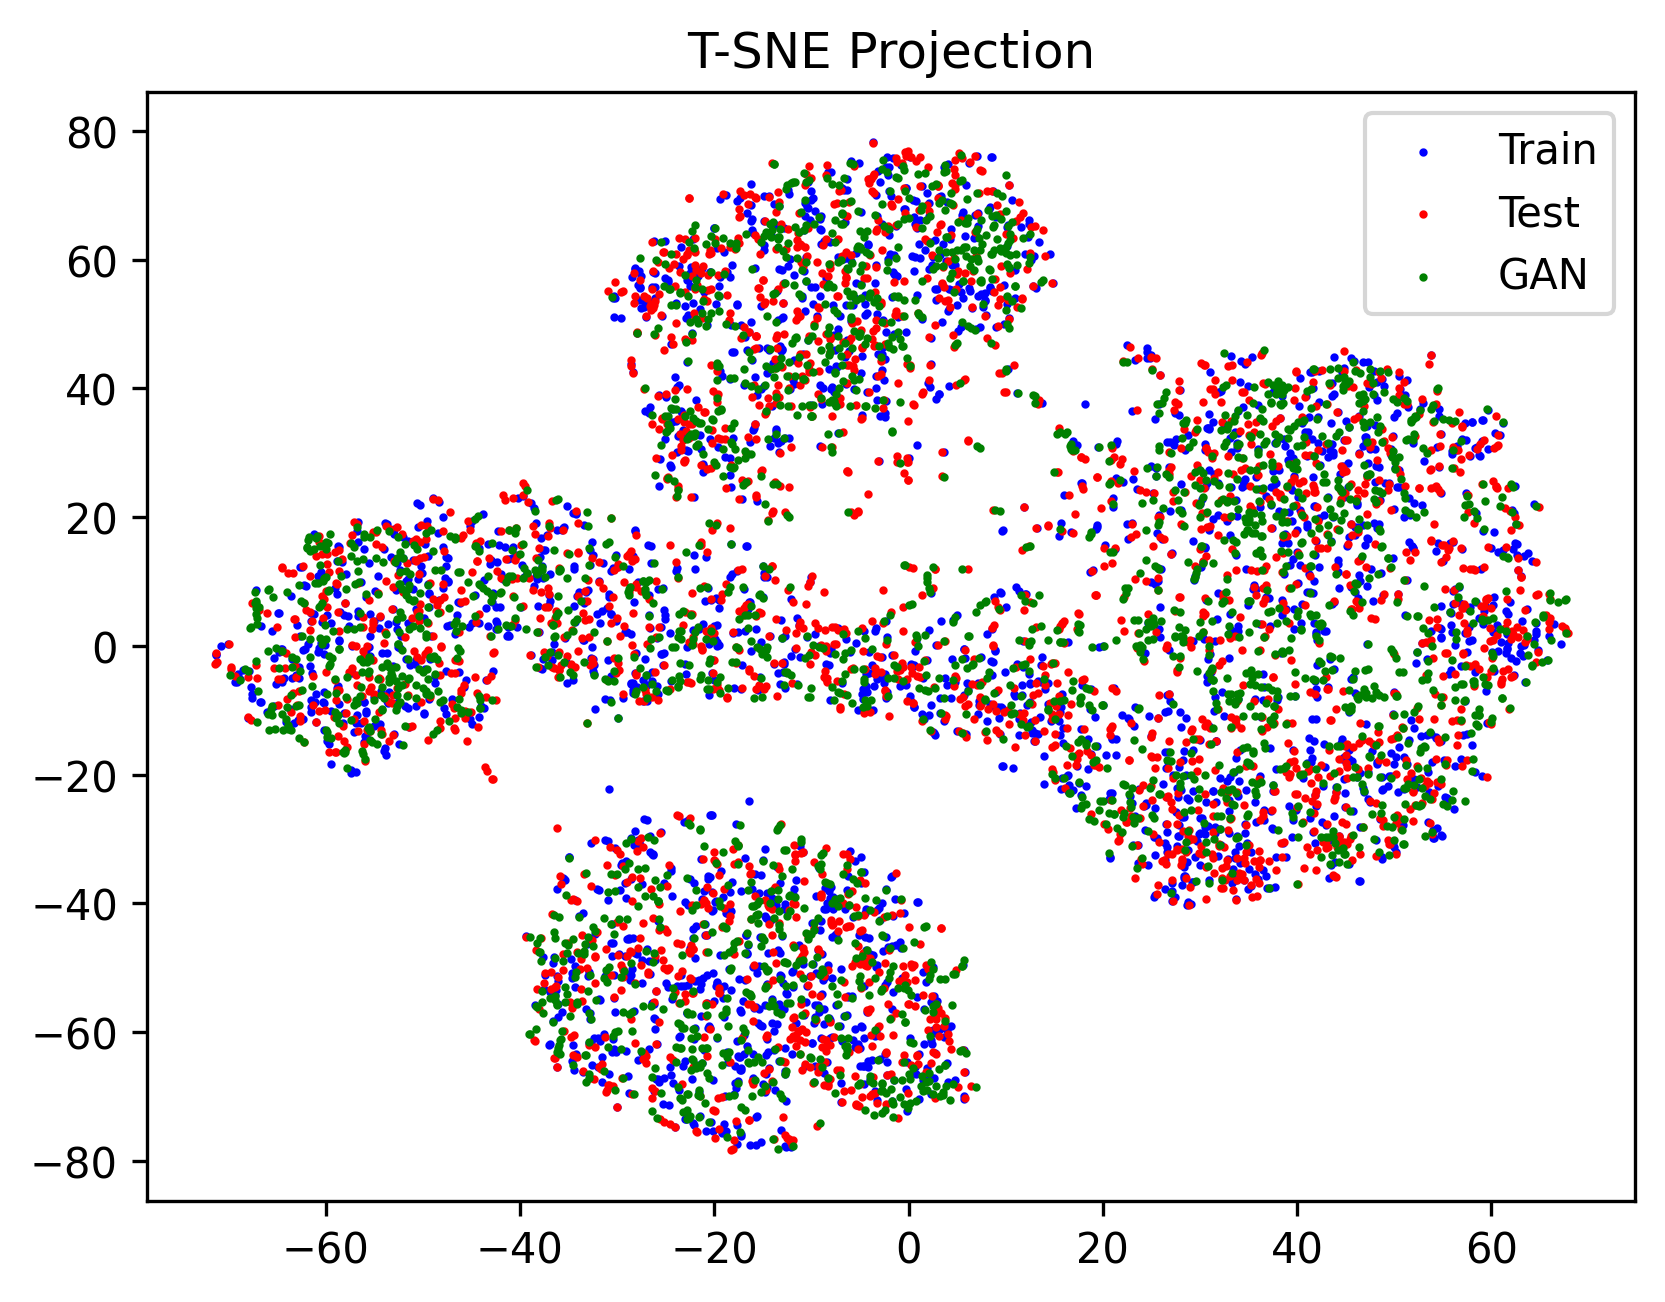

In [8]:
from sklearn.manifold import TSNE
tsne = TSNE()

features = np.concatenate([train_features, test_features, generated_features], axis=0)
proj = tsne.fit_transform(features)

plt.figure(dpi=300)
plt.title("T-SNE Projection")
plt.xlabel("")
plt.scatter(proj[:2500,0], proj[:2500,1], label="Train", s=1, color="blue")
plt.scatter(proj[2500:5000,0], proj[2500:5000,1], label="Test", s=1, color="red")
plt.scatter(proj[5000:,0], proj[5000:,1], label="GAN", s=1, color="green")
plt.legend()
plt.savefig("tsne.png")

In [18]:
#classification accuracy
accs = np.zeros(10)
for i in range(10):
    
    num_right = 0
    for j in range(10): #we take 500 samples per class
        z = torch.randn((50,100)).to(device)
        target = torch.ones(50).long().to(device)*i

        with torch.no_grad():
            imgs = generator(z, target)
            out = classifier(imgs)
            _, pred = out.max(1)
            num_right += torch.sum(torch.eq(pred, target)).cpu().numpy()
        
        accs[i] = num_right/500.0*100.0
print('Accuracy per class', ', '.join(map(lambda x: "{:.2f}%".format(x), accs)))
print('Mean accuracy {:.2f}%'.format(np.mean(accs)))

Accuracy per class 90.60%, 99.40%, 91.80%, 97.40%, 81.00%, 98.00%, 76.40%, 94.40%, 97.80%, 94.20%
Mean accuracy 92.10%
